# 3rd[Gradient Descent and Cost Function]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("gradient_decent.csv")


In [3]:
x = np.array(df['math'])
y = np.array(df['cs'])

In [4]:
def gradient_descent(x,y):
    m_curr = 0
    b_curr = 0
    iterations = 1000000
    n = len(x)
    learning_rate = 0.0002

    cost_previous = 0

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n)*sum([value**2 for value in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        if math.isclose(cost, cost_previous, rel_tol=1e-20):
            break
        cost_previous = cost
        #print ("m {}, b {}, cost {}, iteration {}".format(m_curr,b_curr,cost, i))#commented this line to decrease the size of this file

    return m_curr, b_curr

In [5]:
x = np.array(df.math)
y = np.array(df.cs)

m, b = gradient_descent(x,y)
#print("Using gradient descent function: Coef {} Intercept {}".format(m, b))#commented this line to decrease the size of this file


In [6]:
def predict_using_sklean():
    df = pd.read_csv("gradient_decent.csv")
    r = LinearRegression()
    r.fit(df[['math']],df.cs)
    return r.coef_, r.intercept_

In [7]:
m_sklearn, b_sklearn = predict_using_sklean()
print("Using sklearn: Coef {} Intercept {}".format(m_sklearn,b_sklearn))

Using sklearn: Coef [1.01773624] Intercept 1.9152193111569176


In [8]:
def gradient_descent_plot(x,y):
    m_curr = b_curr = 0
    rate = 0.0002
    n = len(x)
    plt.scatter(x,y,color='red',marker='+',linewidth='5')
    for i in range(100000):
        y_predicted = m_curr * x + b_curr
#         print (m_curr,b_curr, i)
        plt.plot(x,y_predicted,color='green')
        md = -(2/n)*sum(x*(y-y_predicted))
        yd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - rate * md
        b_curr = b_curr - rate * yd

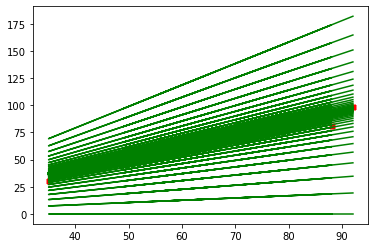

In [9]:
gradient_descent_plot(x, y)

# 4th[Save Model Using Joblib And Pickle]

In [10]:
import numpy as np
import pandas as pd
import pickle
from sklearn import linear_model

In [11]:
df = pd.read_csv("areas_prices.csv")


In [12]:
train = linear_model.LinearRegression()

In [13]:
train.fit(df[['area']],df.price)

LinearRegression()

In [14]:
train.predict([[1000]])

array([316404.10958904])

In [15]:
with open ("trained_area",'wb') as f:
    pickle.dump(train,f)

In [16]:
with open("trained_area",'rb') as f:
    check = pickle.load(f)

In [17]:
check.predict([[400]])

array([234931.50684932])

In [18]:
import joblib

In [19]:
with open ("trained_area",'wb') as f:
    joblib.dump(train,f)

In [20]:
with open("trained_area",'rb') as f:
    check = joblib.load(f)

In [21]:
check.predict([[400]])

array([234931.50684932])

# 4th[Dummy Variables & One Hot Encoding]

In [22]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [35]:
df = pd.read_csv("car_prices.csv")

In [34]:
dummies = pd.get_dummies(df['Car Model'])

In [33]:
final = pd.concat([df,dummies], axis=1)


In [36]:
final = final.drop(final[['Car Model','BMW X5']], axis =1)

In [37]:
model = linear_model.LinearRegression()

In [38]:
X = final.drop(final[['Sell Price($)']], axis = 1)


In [40]:
Y = final['Sell Price($)']

In [41]:
model.fit(X,Y)

LinearRegression()

In [42]:
model.predict([[59000,5,0,1]])

array([30477.15426153])

In [43]:
model.score(X,Y)

0.9417050937281082

In [44]:
model.predict([[83000,7,0,1]])

array([18929.31674144])

In [45]:
model.predict([[67000,1,0,1]])

array([32845.99201702])

In [46]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer


le = LabelEncoder()

In [49]:
dfle = df 
dfle['Car Model'] = le.fit_transform(dfle['Car Model'])

In [50]:
X = dfle[['Car Model','Mileage','Age(yrs)']].values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [51]:
Y = dfle['Sell Price($)']
Y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [52]:
#ohe = OneHotEncoder(categories=[0])

In [53]:
#X = ohe.fit_transform(X).np.toarray()

In [54]:
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [0])],   # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                                         # Leave the rest of the columns untouched
)

X = ct.fit_transform(X)

In [55]:
X = X[:,1:]
X

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [56]:
model.fit(X,Y)

LinearRegression()

In [57]:
model.predict([[1,0,6,69000]])

array([-91887064.10732567])

In [58]:
model.score(X,Y)

0.9417050937281083

In [59]:
model.fit(X,Y)

LinearRegression()

# 7th[Training and Testing Data]

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [61]:
df = pd.read_csv('Training and Testing Data.csv')
df

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [62]:
X = df[['Mileage','Age(yrs)']]
X

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [63]:
Y = df['Sell Price($)']
Y

0     18000
1     34000
2     26100
3     40000
4     31500
5     26750
6     32000
7     19300
8     12000
9     22000
10    18700
11    19500
12    26000
13    27500
14    19400
15    35000
16    35500
17    19700
18    12800
19    28200
Name: Sell Price($), dtype: int64

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1)

In [65]:
len(X_train)

18

In [66]:
from sklearn import linear_model

In [67]:
test = linear_model.LinearRegression()
test.fit(X_train,Y_train)

LinearRegression()

In [68]:
test.predict(X_test)

array([16479.0892811 , 38755.64634227])

In [69]:
test.score(X_train,Y_train)

0.9234455176102714

# 8th[Logistic Regression (Binary Classification)]

In [70]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import math

In [71]:
df = pd.read_csv('insurance_data.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [72]:
model = linear_model.LogisticRegression()

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(df[['age']], df['bought_insurance'], train_size = 0.8)

In [74]:
Y_train

22    1
8     1
11    0
2     1
19    0
24    1
0     0
23    1
6     0
14    1
1     0
21    0
25    1
26    0
10    0
12    0
15    1
20    0
17    1
7     1
9     1
Name: bought_insurance, dtype: int64

In [75]:
model.fit(X_train,Y_train)

LogisticRegression()

In [76]:
y_predicted = model.predict(X_test)
y_predicted

array([1, 1, 1, 0, 0, 0], dtype=int64)

In [77]:
model.predict_proba(X_test)

array([[0.04023749, 0.95976251],
       [0.08338565, 0.91661435],
       [0.22527326, 0.77472674],
       [0.98190517, 0.01809483],
       [0.88667089, 0.11332911],
       [0.94437308, 0.05562692]])

In [78]:
model.score(X_test,Y_test)

0.6666666666666666

In [79]:
model.predict([[22]])

array([0], dtype=int64)

In [80]:
model.predict_proba([[22]])

array([[0.96810407, 0.03189593]])

In [81]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [82]:
def prediction_function(age):
    z = 0.042 * age - 1.53 
    y = sigmoid(z)
    return y

In [83]:
age = 35
prediction_function(age)#less than 0.5==0

0.4850044983805899

exercise

In [89]:
import pandas as pd
from sklearn import linear_model

In [90]:
df = pd.read_csv('HR_comma_sep.csv')

In [91]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [92]:
left = df[df.left==1]
left.shape

(3571, 10)

In [93]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [94]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


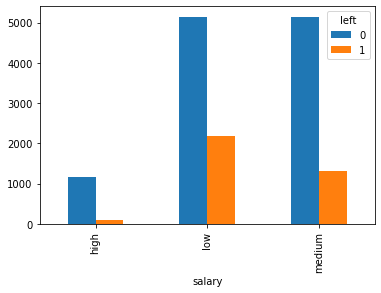

In [95]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

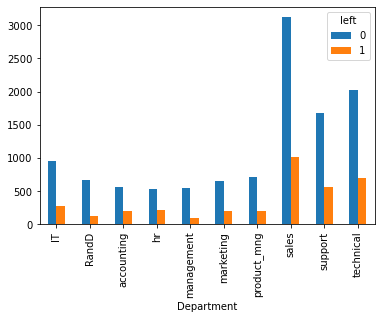

In [96]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [97]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [98]:
salary_dummies = pd.get_dummies(subdf.salary,prefix='salary')

In [99]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [100]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [101]:
X = df_with_dummies
X.head()
len(X)

14999

In [102]:
Y = df.left
len(Y)

14999

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [104]:
print(len(X_train))
print(len(Y_train))

11999
11999


In [105]:
model = linear_model.LogisticRegression()

In [106]:
model.fit(X_train, Y_train)

C:\Users\vishal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [107]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [108]:
model.score(X_test, Y_test)

0.7753333333333333

# 9th[Logistic Regression (Multiclass Classification)]

In [109]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
digits = load_digits()

In [111]:
len(digits.data)

1797

In [112]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

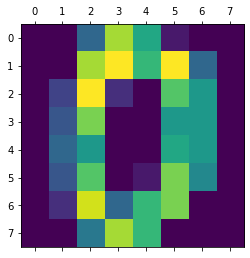

In [113]:
plt.matshow(digits.images[0])

<Figure size 432x288 with 0 Axes>

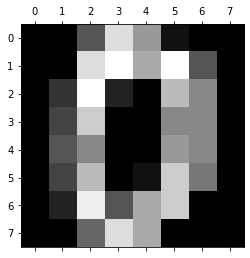

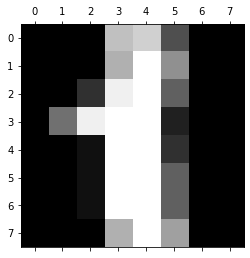

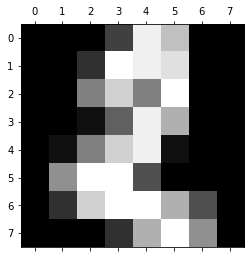

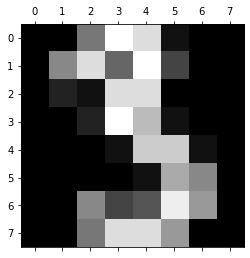

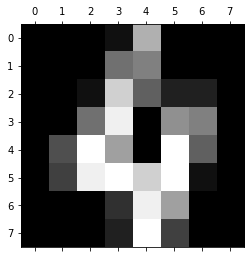

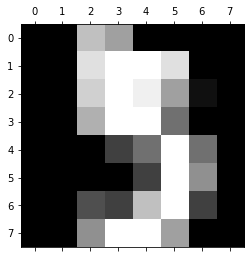

In [114]:
plt.gray()
for i in range(6):
    plt.matshow(digits.images[i])

In [115]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

In [118]:
len(X_train)

1437

In [119]:
model.fit(X_train, Y_train)

C:\Users\vishal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [120]:
model.score(X_test, Y_test)

0.9694444444444444

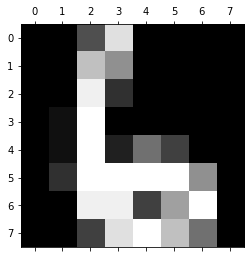

In [121]:
plt.matshow(digits.images[67])

In [122]:
digits.target[67]

6

In [123]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

# 9 [Decision Tree]

In [124]:
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [125]:
df = pd.read_csv("titanic_data.csv")
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [126]:
df = df.interpolate()

In [127]:
new_df = df.drop(df[['Survived']], axis = 1)
new_df

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,22.5,23.4500
889,1,male,26.0,30.0000


In [128]:
Y = df.Survived

In [129]:
le_sex = LabelEncoder()
le_Pclass = LabelEncoder()

In [130]:
#new_df['Pclass_n'] = le_Pclass.fit_transform(new_df['Pclass'])
new_df['Sex_n'] = le_sex.fit_transform(new_df['Sex'])

In [131]:
new_df

,Pclass,Sex,Age,Fare,Sex_n
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1
...,...,...,...,...,...
886,2,male,27.0,13.0000,1
887,1,female,19.0,30.0000,0
888,3,female,22.5,23.4500,0
889,1,male,26.0,30.0000,1


In [132]:
new_df = new_df.drop(df[['Sex']], axis = 1)

In [133]:
new_df

,Pclass,Age,Fare,Sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,22.5,23.4500,0
889,1,26.0,30.0000,1


In [134]:
model = tree.DecisionTreeClassifier()

In [135]:
model.fit(new_df, Y)

DecisionTreeClassifier()

In [136]:
model.score(new_df, Y)

0.9876543209876543

In [137]:
model.predict([[1,28,72.25,1]])

array([1], dtype=int64)

In [138]:
model.predict([[2,31,30,0]])#0=men,1=women 

array([1], dtype=int64)

# 10[Support Vector Machine (SVM)]

In [139]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
import  matplotlib.pyplot as plt
%matplotlib inline

In [140]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [141]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head(6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4


In [142]:
df['target'] = iris.target
df.head(6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


In [143]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [144]:
df['flower name'] = df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [145]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

Text(0.5, 0, 'seal width(cm)')

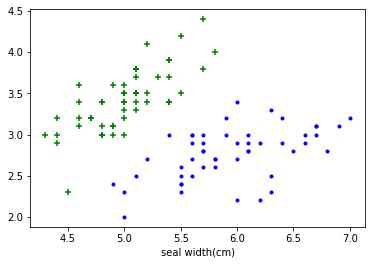

In [146]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],c = 'g', marker = '+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],c = 'b', marker = '.')
plt.xlabel('seal length(cm)')
plt.xlabel('seal width(cm)')


Text(0.5, 0, 'seal width(cm)')

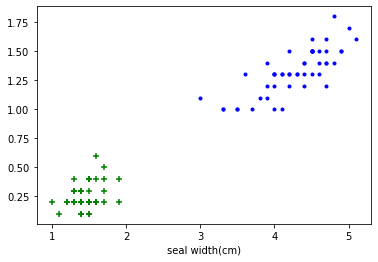

In [147]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],c = 'g', marker = '+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],c = 'b', marker = '.')
plt.xlabel('seal length(cm)')
plt.xlabel('seal width(cm)')


In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X = df.drop(df[['flower name', 'target']], axis = 1)
Y = df.target

In [150]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [151]:
from sklearn.svm import SVC
model = SVC()

In [152]:
model.fit(X_train, Y_train)

SVC()

In [153]:
model.score(X_test, Y_test)

0.9333333333333333